### Deliverable 1: Preprocessing the Data for a Neural Network

In [171]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import pandas as pd
import tensorflow as tf

#  Import and read the charity_data.csv.
import pandas as pd 
application_df = pd.read_csv("charity_data.csv")
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [172]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
#  YOUR CODE GOES HERE
application_df.drop(columns=['EIN','NAME'],axis = 1,inplace =True)

In [173]:
# Determine the number of unique values in each column.
#  YOUR CODE GOES HERE
application_df.nunique()

APPLICATION_TYPE            17
AFFILIATION                  6
CLASSIFICATION              71
USE_CASE                     5
ORGANIZATION                 4
STATUS                       2
INCOME_AMT                   9
SPECIAL_CONSIDERATIONS       2
ASK_AMT                   8747
IS_SUCCESSFUL                2
dtype: int64

In [174]:
# Look at APPLICATION_TYPE value counts for binning
#  YOUR CODE GOES HERE
application_df['APPLICATION_TYPE'].value_counts()

T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T14        3
T25        3
T29        2
T15        2
T17        1
Name: APPLICATION_TYPE, dtype: int64

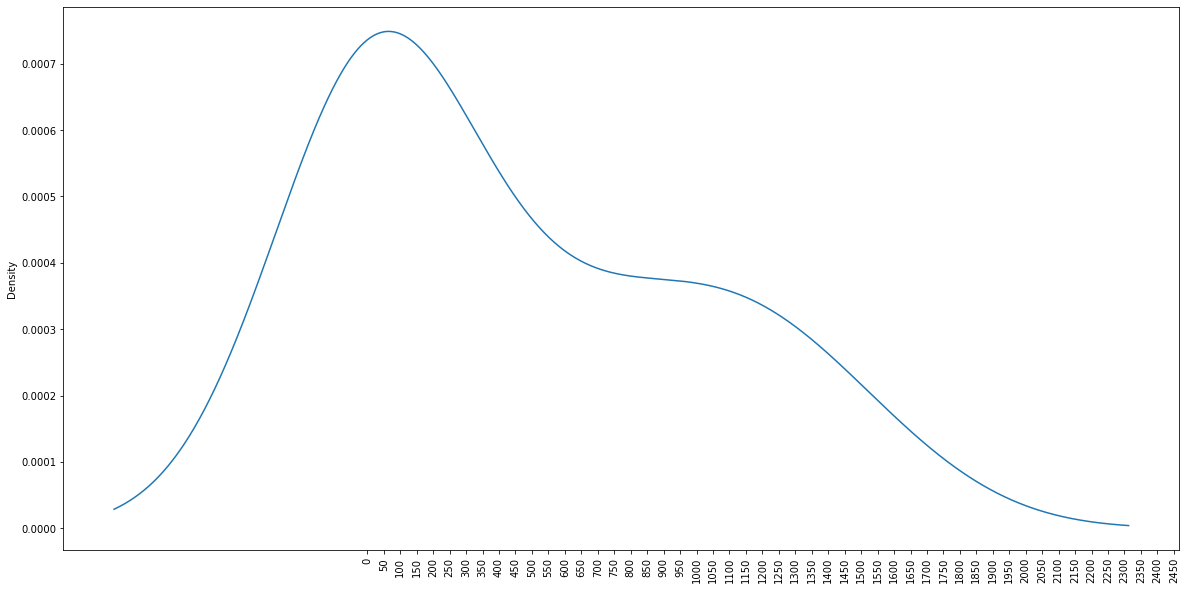

In [175]:
# Visualize the value counts of APPLICATION_TYPE
#  YOUR CODE GOES HERE
application_df['APPLICATION_TYPE'].value_counts()[1:].plot.density(xticks = range(0,2500,50) ,rot = 90,figsize = (20,10))

In [176]:
# Determine which values to replace if counts are less than ...?
#  YOUR CODE GOES HERE
replace_application = application_df['APPLICATION_TYPE'].value_counts()[application_df['APPLICATION_TYPE'].value_counts().values <500].index
# Replace in dataframe
for app in replace_application:
    application_df.APPLICATION_TYPE = application_df.APPLICATION_TYPE.replace(app,"Other")
    
# Check to make sure binning was successful
application_df.APPLICATION_TYPE.value_counts()


T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
Other      276
Name: APPLICATION_TYPE, dtype: int64

In [177]:
# Look at CLASSIFICATION value counts for binning
#  YOUR CODE GOES HERE
application_df['CLASSIFICATION'].value_counts()

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C1370        1
C4120        1
C1728        1
C8210        1
C1283        1
Name: CLASSIFICATION, Length: 71, dtype: int64

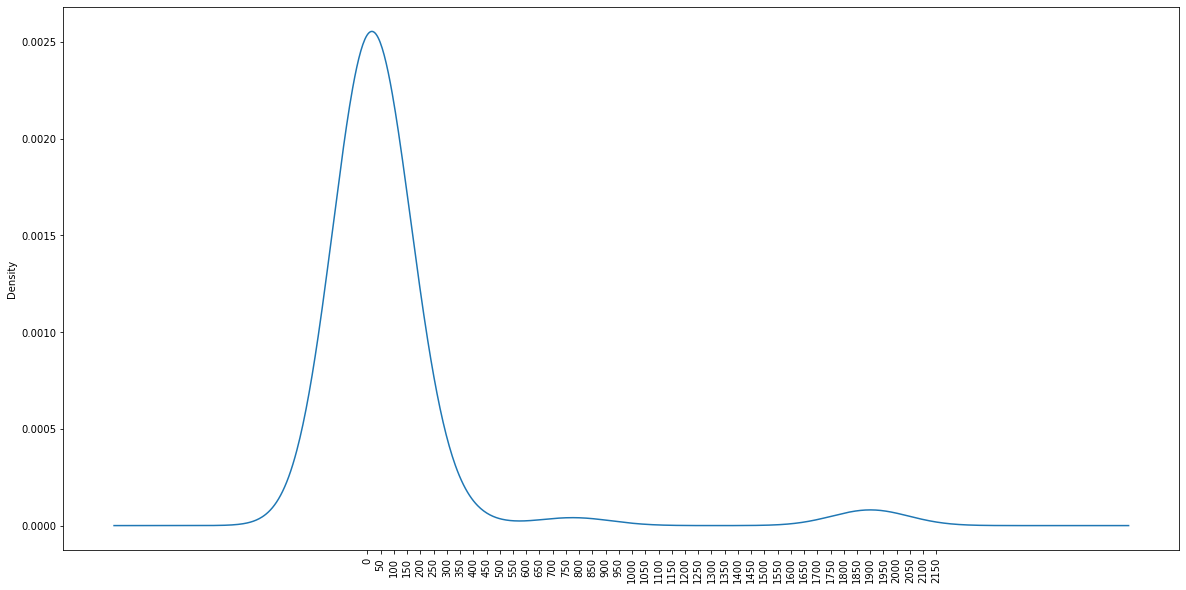

In [178]:
# Visualize the value counts of CLASSIFICATION
#  YOUR CODE GOES HERE
application_df['CLASSIFICATION'].value_counts()[3:].plot.density(xticks = range(0,2200,50),rot = 90,figsize = (20,10))

In [179]:
# Determine which values to replace if counts are less than ..?
#  YOUR CODE GOES HERE
replace_class = application_df['CLASSIFICATION'].value_counts()[application_df['CLASSIFICATION'].value_counts().values < 300].index
# Replace in dataframe
for cls in replace_class:
    application_df.CLASSIFICATION = application_df.CLASSIFICATION.replace(cls,"Other")
    
# Check to make sure binning was successful


In [180]:
# Generate our categorical variable lists
#  YOUR CODE GOES HERE
application_df['STATUS'] = application_df['STATUS'].apply(str)
cat_list = application_df.columns[application_df.dtypes == 'object'].to_list()


['APPLICATION_TYPE',
 'AFFILIATION',
 'CLASSIFICATION',
 'USE_CASE',
 'ORGANIZATION',
 'STATUS',
 'INCOME_AMT',
 'SPECIAL_CONSIDERATIONS']

In [181]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
#  YOUR CODE GOES HERE
encode_df = pd.DataFrame(enc.fit_transform(application_df[cat_list]))
# Add the encoded variable names to the dataframe
encode_df.columns = enc.get_feature_names(cat_list)
encode_df.head()

,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,APPLICATION_TYPE_T7,APPLICATION_TYPE_T8,AFFILIATION_CompanySponsored,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [182]:
# Merge one-hot encoded features and drop the originals
#  YOUR CODE GOES HERE
application_df1 = application_df.merge(encode_df,left_index = True,right_index=True).drop(columns=cat_list,axis = 1)

In [183]:
# Split our preprocessed data into our features and target arrays
#  YOUR CODE GOES HERE
X = application_df1.drop('IS_SUCCESSFUL',1).values
y = application_df1['IS_SUCCESSFUL'].values

# Split the preprocessed data into a training and testing dataset
#  YOUR CODE GOES HERE
X_train,X_test,y_train,y_test = train_test_split(X,y, random_state = 78)

In [198]:
# Create a StandardScaler instances
scalerTr = StandardScaler()
scalerTe = StandardScaler()
# Fit the StandardScaler
Xtr_scaler = scalerTr.fit(X_train)
Xte_scaler = scalerTe.fit(X_test)
# Scale the data
X_train_scaled = Xtr_scaler.transform(X_train)
X_test_scaled = Xte_scaler.transform(X_test)

### Deliverable 2: Compile, Train and Evaluate the Model

In [187]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
#  YOUR CODE GOES HERE

nn = tf.keras.models.Sequential()

# First hidden layer
#  YOUR CODE GOES HERE
nn.add(tf.keras.layers.Dense(units = 80,activation = 'relu',input_dim = len(X_train_scaled[0])))

# Second hidden layer
#  YOUR CODE GOES HERE
nn.add(tf.keras.layers.Dense(units = 30,activation = 'relu'))
# Output layer
#  YOUR CODE GOES HERE
nn.add(tf.keras.layers.Dense(units = 1,activation = 'sigmoid'))
# Check the structure of the model
nn.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 80)                3680      
_________________________________________________________________
dense_7 (Dense)              (None, 30)                2430      
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 31        
Total params: 6,141
Trainable params: 6,141
Non-trainable params: 0
_________________________________________________________________


In [188]:
# Compile the model
#  YOUR CODE GOES HERE
nn.compile(loss = 'binary_crossentropy',optimizer = 'adam',metrics = ['accuracy'])

In [189]:
# Train the model
#  YOUR CODE GOES HERE
nn_mode = nn.fit(X_train_scaled,y_train,epochs = 100)

Epoch 1/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5701 - accuracy: 0.7221
Epoch 2/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5543 - accuracy: 0.7302
Epoch 3/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5513 - accuracy: 0.7310
Epoch 4/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5502 - accuracy: 0.7327
Epoch 5/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5490 - accuracy: 0.7328
Epoch 6/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5483 - accuracy: 0.7333
Epoch 7/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5469 - accuracy: 0.7335
Epoch 8/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5462 - accuracy: 0.7337
Epoch 9/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5458 - accuracy: 0.7343
Epoch 10/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5455 - accura

In [190]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.5560 - accuracy: 0.7247
Loss: 0.5559902191162109, Accuracy: 0.7246647477149963


In [194]:
import os 
from tensorflow.keras.callbacks import ModelCheckpoint
os.makedirs('checkpoints/',exist_ok = True)
checkpoint_path = "checkpoints/weights.{epoch:02d}.hdf5"

In [197]:
cp_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    verbose=1,
    save_weights_only=True,
    save_freq=4000)

# Train the model
fit_model = nn.fit(X_train_scaled,y_train,epochs=100,callbacks=[cp_callback])

# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

Epoch 1/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5303 - accuracy: 0.7425
Epoch 2/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5313 - accuracy: 0.7420
Epoch 3/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5321 - accuracy: 0.7424
Epoch 4/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5307 - accuracy: 0.7425
Epoch 5/100
776/804 [===========================>..] - ETA: 0s - loss: 0.5307 - accuracy: 0.7421
Epoch 00005: saving model to checkpoints\weights.05.hdf5
804/804 [==============================] - 1s 1ms/step - loss: 0.5307 - accuracy: 0.7426
Epoch 6/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5306 - accuracy: 0.7423
Epoch 7/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5308 - accuracy: 0.7428
Epoch 8/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5307 - accuracy: 0.7426
Epoch 9/100
804/804 [=============================